In [1]:
# Importing Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import sqlite3

In [2]:
# Importing data
conn = sqlite3.connect('data.db')
churn_data = pd.read_sql_query("SELECT * FROM data", conn)
conn.close()
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
# Checking number of unique values under "Geography"
churn_data.value_counts("Geography")

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [4]:
# Dropping non-essential columns in reference to churn potential
churn_data = churn_data.drop(["RowNumber", "CustomerId", "Surname", "Geography"], axis=1)
churn_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [5]:
# Finding the number of unique values in each column
churn_data.nunique()

CreditScore            460
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

In [6]:
# Looking at the value counts for "Tenure" for binning
tenure_vcounts = churn_data["Tenure"].value_counts()
tenure_vcounts

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [7]:
# Looking at value counts for "Satisfaction Score" for binning
satisfaction = churn_data["Satisfaction Score"].value_counts()
satisfaction

Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64

In [8]:
# Looking at value counts for "Credit Score" for binning
# Excellent: 800–850
# Very Good: 740–799
# Good: 670–739
# Fair: 580–669
# Poor: 300–579
cred_score = churn_data["CreditScore"].value_counts()
cred_score

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

In [9]:
# Choosing a cutoff value and create a list of credit score values to be replaced
credit_scores_to_replace = list(cred_score.iloc[10:].index)
cutoff = 40

# Replace in dataframe
# Using "Below x" as I don't know what to label it yet
for cred in credit_scores_to_replace:
    churn_data["CreditScore"] = churn_data["CreditScore"].replace(cred, "Below x")

# Checking if binning was successful
churn_data["CreditScore"].value_counts()

CreditScore
Below x    9296
850         233
678          63
655          54
667          53
705          53
684          52
670          50
651          50
652          48
683          48
Name: count, dtype: int64

In [10]:
# Converting categorical data to numeric with "pd.get_dummies"
# Probably need to sort out the credit score first since we are getting some individual credit score columns
numerics = pd.get_dummies(churn_data)
numerics

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,...,CreditScore_684,CreditScore_705,CreditScore_850,CreditScore_Below x,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,42,2,0.00,1,1,1,101348.88,1,1,2,...,False,False,False,True,True,False,True,False,False,False
1,41,1,83807.86,1,0,1,112542.58,0,1,3,...,False,False,False,True,True,False,True,False,False,False
2,42,8,159660.80,3,1,0,113931.57,1,1,3,...,False,False,False,True,True,False,True,False,False,False
3,39,1,0.00,2,0,0,93826.63,0,0,5,...,False,False,False,True,True,False,False,True,False,False
4,43,2,125510.82,1,1,1,79084.10,0,0,5,...,False,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,0,0,1,...,False,False,False,True,False,True,True,False,False,False
9996,35,10,57369.61,1,1,1,101699.77,0,0,5,...,False,False,False,True,False,True,False,False,True,False
9997,36,7,0.00,1,0,1,42085.58,1,1,3,...,False,False,False,True,True,False,False,False,False,True
9998,42,3,75075.31,2,1,0,92888.52,1,1,2,...,False,False,False,True,False,True,False,True,False,False


In [11]:
# Splitting preprocessed data into featured and target arrays
y = numerics["Exited"].values
x = numerics.drop("Exited", axis = 1).values

# Getting the training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [12]:
# Creating StandardScaler instances
scaler = StandardScaler()

# Fitting StandardScaler
x_scaler = scaler.fit(x_train)

# Scaling data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

In [13]:
#Determine number of input features
input_features = x_train_scaled.shape[1]
input_features

27

In [14]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value= 90,
        step=5), activation=activation, input_dim=input_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [15]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2
)

Reloading Tuner from .\untitled_project\tuner0.json


In [16]:
# Run the kerastuner search for best hyperparameters
max_trials = 10
for trial in range(max_trials):
    tuner.search(x_train_scaled, y_train, epochs=50, validation_data=(x_test_scaled, y_test))
    if len(tuner.oracle.trials) >= max_trials:
        break

In [17]:
# Top 3 model hyperparameters 
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'tanh', 'first_units': 41, 'num_layers': 1, 'units_0': 11, 'units_1': 11, 'units_2': 11, 'units_3': 21, 'units_4': 26, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 3, 'tuner/round': 0}
{'activation': 'tanh', 'first_units': 21, 'num_layers': 1, 'units_0': 11, 'units_1': 6, 'units_2': 16, 'units_3': 1, 'units_4': 1, 'tuner/epochs': 6, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}
{'activation': 'tanh', 'first_units': 86, 'num_layers': 2, 'units_0': 11, 'units_1': 21, 'units_2': 21, 'units_3': 16, 'units_4': 1, 'tuner/epochs': 17, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}


In [18]:
# Top 3 models
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(x_test_scaled,y_test,verbose=2)
    print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

C:\Users\domin\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\domin\anaconda3\envs\dev\lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
C:\Users\domin\anaconda3\envs\dev\lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


79/79 - 0s - 5ms/step - accuracy: 0.9992 - loss: 0.0135
Loss: 0.013505729846656322, Accuracy: 0.9991999864578247
79/79 - 0s - 4ms/step - accuracy: 0.9992 - loss: 0.0095
Loss: 0.009509122930467129, Accuracy: 0.9991999864578247
79/79 - 0s - 4ms/step - accuracy: 0.9992 - loss: 0.0115
Loss: 0.011542708612978458, Accuracy: 0.9991999864578247


In [19]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters()[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 41,
 'num_layers': 1,
 'units_0': 11,
 'units_1': 11,
 'units_2': 11,
 'units_3': 21,
 'units_4': 26,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 3,
 'tuner/round': 0}

In [20]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

79/79 - 0s - 6ms/step - accuracy: 0.9992 - loss: 0.0135
Loss: 0.013505729846656322, Accuracy: 0.9991999864578247


IndexError: index 40 is out of bounds for axis 0 with size 27

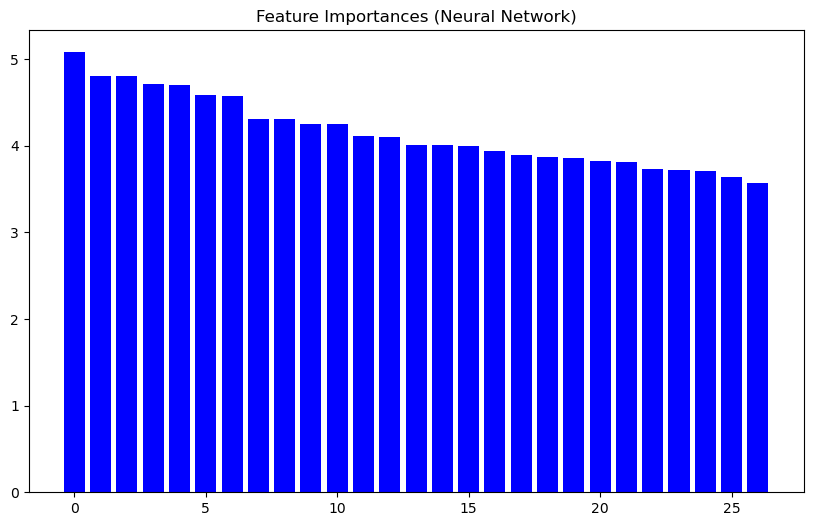

In [22]:
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt

# Get weights of the first layer (input layer)
input_layer_weights = best_model.layers[0].get_weights()[0]

# Calculate feature importances by summing the absolute weights for each feature
feature_importances = np.sum(np.abs(input_layer_weights), axis=0)

# Get feature names
feature_names = numerics.drop("Exited", axis=1).columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Ensure the number of features to consider is limited to the minimum between the length of feature importances and the length of feature names
num_features = min(len(feature_importances), len(feature_names))

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Neural Network)")
plt.bar(range(num_features), feature_importances[indices[:num_features]], color="b", align="center")
plt.xticks(range(num_features), feature_names[indices[:num_features]], rotation=90)
plt.xlim([-1, num_features])
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()